In [147]:
import re
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt

### Splits each line by '/' and stores entry of name and text. Returns list.

In [148]:
def split_name_text(text_data):

    # Initialize a list to store dictionaries
    entries = []

    # Extract the name and text part from each line
    for line in text_data:
        parts = line.split('/')
        name = parts[2]
        text = line.split(':', 1)[1].strip()
        
        # Create a dictionary for each entry
        entry = {'Name': name, 'Text': text}
        
        # Append the dictionary to the list
        entries.append(entry)


    # Return list
    return entries

### Filters 'spe.text' to ensure that each line of the file contains spe(followed by a space or apostrophe) or 'special purpose ent .* and returns the list


In [149]:
def filter_dict(entries):

    # Patterns to search
    pattern = r'spe(?=[\s\'s])'
    pattern2 = r'special purpose ent(?=.*)'


    # Initialize a new list to store filtered entries
    filtered_entries = []

    # Iterate through each entry in the list
    for entry in entries:
        if re.search(pattern, entry['Text'], re.IGNORECASE) or re.search(pattern2, entry['Text'], re.IGNORECASE):
            # If the condition is met, append the entry to the filtered list
            filtered_entries.append(entry)

    # Update the entries list with the filtered entries
    entries = filtered_entries

    return entries

### Generates each list to a csv 'output.csv'


In [150]:
def to_csv(entries):
    # Specify the path for the CSV file
    csv_file = 'output.csv'

    # Write the contents of the list of dictionaries to the CSV file
    with open(csv_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['Name', 'Text'])
        
        # Write the header row
        writer.writeheader()
        
        # Write each dictionary as a row in the CSV file
        for entry in entries:
            writer.writerow(entry)

    print("CSV file has been created successfully.")


### Takes 'output.csv' and generates a DataFrame, then removes the duplicates and returns the DataFrame

In [151]:
def to_pd():
    # Read the CSV file into a DataFrame
    df = pd.read_csv('output.csv')

    # Drops the duplicates
    df.drop_duplicates()

    return df


### Creates a list of unique names that occur in the original text file


In [152]:
def drop_dup_names(df):
    # Initialise column of unique names 
    names_df = df['Name'].drop_duplicates()

    # Initialise list of names
    names_list = []

    # Adds each name from the DataFrame to the list
    for name in names_df:
        names_list.append(name)

    return names_list

### Creates a list of names that were involved in emails from 2001

In [153]:
def year_check():
    # Read '2001.text'
    with open('./2001.text', 'r',) as file:
        # Read each line of '2001.text'
        year_data = file.readlines()


    # Initialise list of names
    names2001 = []

    # Takes each line of year_data, splits by '/' and takes just the name. Appends to list.
    for line in year_data:
        parts = line.split('/')
        name = parts[2]
        names2001.append(name)

    return names2001


### Creates a Dataframe for names2001

In [154]:
def to_df_2001(names2001):
    # Create a DataFrame from the list of names, specifying the column name as 'Names'
    df_names_2001 = pd.DataFrame(names2001, columns=['Names'])
    # Drop duplicate entries in the 'Names' column and assign the result back to df_names_2001
    df_names_2001 = df_names_2001['Names'].drop_duplicates()

    # Initialize an empty list to store unique names
    names_2001_list = []

    # Iterate through each unique name in the DataFrame
    for name in df_names_2001:
        # Append the name to the names_2001_list
        names_2001_list.append(name)

    return names_2001_list

### Check Names Function Against 2001 List

In [155]:
def check_names(names_2001_list, names_list):
    
    # Initialize an empty list to store names from names_list that are also in names_2001_list
    names_2001 = []

    # Iterate through each name in names_list
    for name in names_list:
        # Check if the current name exists in names_2001_list
        if name in names_2001_list:
            # If it does, append it to the names_2001 list
            names_2001.append(name)

    
    return names_2001

### Main Code Block

In [156]:
# List of data files to process
data_files = ['./spe.text', 'off_balance.text', './market_to_market.text', './fraud.text', './insider_trading.text']

# Initialize sets and total_name_count variables
sets = []
total_name_count = {}

# Loop through each file in data_files
for file in data_files:

    # Open file for reading
    with open(file, 'r', encoding='utf-8', errors='ignore') as f:
        # Read lines from the file
        text_data = f.readlines()

        # Split the text data into name-text pairs
        name_text = split_name_text(text_data)

        # Filter the name_text if the file is 'SPE.text'
        if file == './SPE.text':
            name_text = filter_dict(name_text)

        # Convert name-text pairs to CSV format
        to_csv(name_text)

        # Extract file name and create dataframe name
        file_name = os.path.basename(file)
        dataframe_name = os.path.splitext(file_name)[0] + '_df'
        
        # Check names against the year 2001
        names2001 = year_check()
        df_2001 = to_df_2001(names2001)

        # Convert name-text pairs to DataFrame
        df = to_pd()

        # Get list of names from DataFrame
        name_count_entry = df['Name'].to_list()

        # Filter names based on names from 2001
        name_count_entry = check_names(df_2001, name_count_entry)

        # Update total_name_count dictionary with name counts
        for name in name_count_entry:
            if name in total_name_count:
                total_name_count[name] += 1
            else:
                total_name_count[name] = 1
        
        # Drop duplicate names from DataFrame
        df = drop_dup_names(df)
        
        # Check completed names against 2001 names
        completed_names = check_names(df_2001, df)

        # Create entry for the current DataFrame
        entry = {'DataFrame': [dataframe_name], 'Employees': completed_names}
        
        # Append entry to sets list
        sets.append(entry)
# Print sets and total name count
print(sets)
print(total_name_count)

CSV file has been created successfully.
CSV file has been created successfully.
CSV file has been created successfully.
CSV file has been created successfully.
CSV file has been created successfully.
[{'DataFrame': ['spe_df'], 'Employees': ['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e', 'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s', 'buy-r', 'campbell-l', 'carson-m', 'cash-m', 'causholli-m', 'corman-s', 'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d', 'dean-c', 'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l', 'donohoe-t', 'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m', 'forney-j', 'fossum-d', 'gay-r', 'geaccone-t', 'germany-c', 'gilbertsmith-d', 'giron-d', 'griffith-j', 'grigsby-m', 'guzman-m', 'haedicke-m', 'hain-m', 'harris-s', 'hayslett-r', 'heard-m', 'hendrickson-s', 'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k', 'hyvl-d', 'jones-t', 'kaminski-v', 'kean-s', 'keavey-p', 'keiser-k', 'king-j', 'kitchen-l', 'kuykendall-t', 'lavorato-

### Counting Occurrences of Employee Names

In [157]:
# Initialize dictionary to count occurrences of each employee name
name_count = {}

# Iterate through each entry in the sets list
for entry in sets:
    for employee in entry['Employees']:  # Accessing the 'Employees' key of each entry
        if employee in name_count:
            name_count[employee] += 1  # Increment count if name is already in dictionary
        else:
            name_count[employee] = 1  # Initialize count if name is encountered for the first time

print(name_count)

{'allen-p': 2, 'arnold-j': 4, 'arora-h': 3, 'badeer-r': 1, 'bailey-s': 1, 'bass-e': 4, 'baughman-d': 4, 'beck-s': 3, 'benson-r': 2, 'blair-l': 5, 'brawner-s': 2, 'buy-r': 5, 'campbell-l': 3, 'carson-m': 3, 'cash-m': 3, 'causholli-m': 2, 'corman-s': 4, 'crandell-s': 2, 'cuilla-m': 2, 'dasovich-j': 4, 'davis-d': 2, 'dean-c': 2, 'delainey-d': 2, 'derrick-j': 3, 'dickson-s': 1, 'donoho-l': 2, 'donohoe-t': 2, 'dorland-c': 3, 'ermis-f': 2, 'farmer-d': 3, 'fischer-m': 2, 'forney-j': 2, 'fossum-d': 3, 'gay-r': 2, 'geaccone-t': 3, 'germany-c': 4, 'gilbertsmith-d': 1, 'giron-d': 3, 'griffith-j': 3, 'grigsby-m': 3, 'guzman-m': 2, 'haedicke-m': 5, 'hain-m': 2, 'harris-s': 2, 'hayslett-r': 3, 'heard-m': 2, 'hendrickson-s': 2, 'hernandez-j': 3, 'hodge-j': 3, 'holst-k': 3, 'horton-s': 3, 'hyatt-k': 4, 'hyvl-d': 2, 'jones-t': 3, 'kaminski-v': 5, 'kean-s': 4, 'keavey-p': 3, 'keiser-k': 3, 'king-j': 3, 'kitchen-l': 4, 'kuykendall-t': 1, 'lavorato-j': 3, 'lay-k': 4, 'lenhart-m': 3, 'lewis-a': 4, 'linder-

### Plotting Top 100 Employee Names by Occurrences

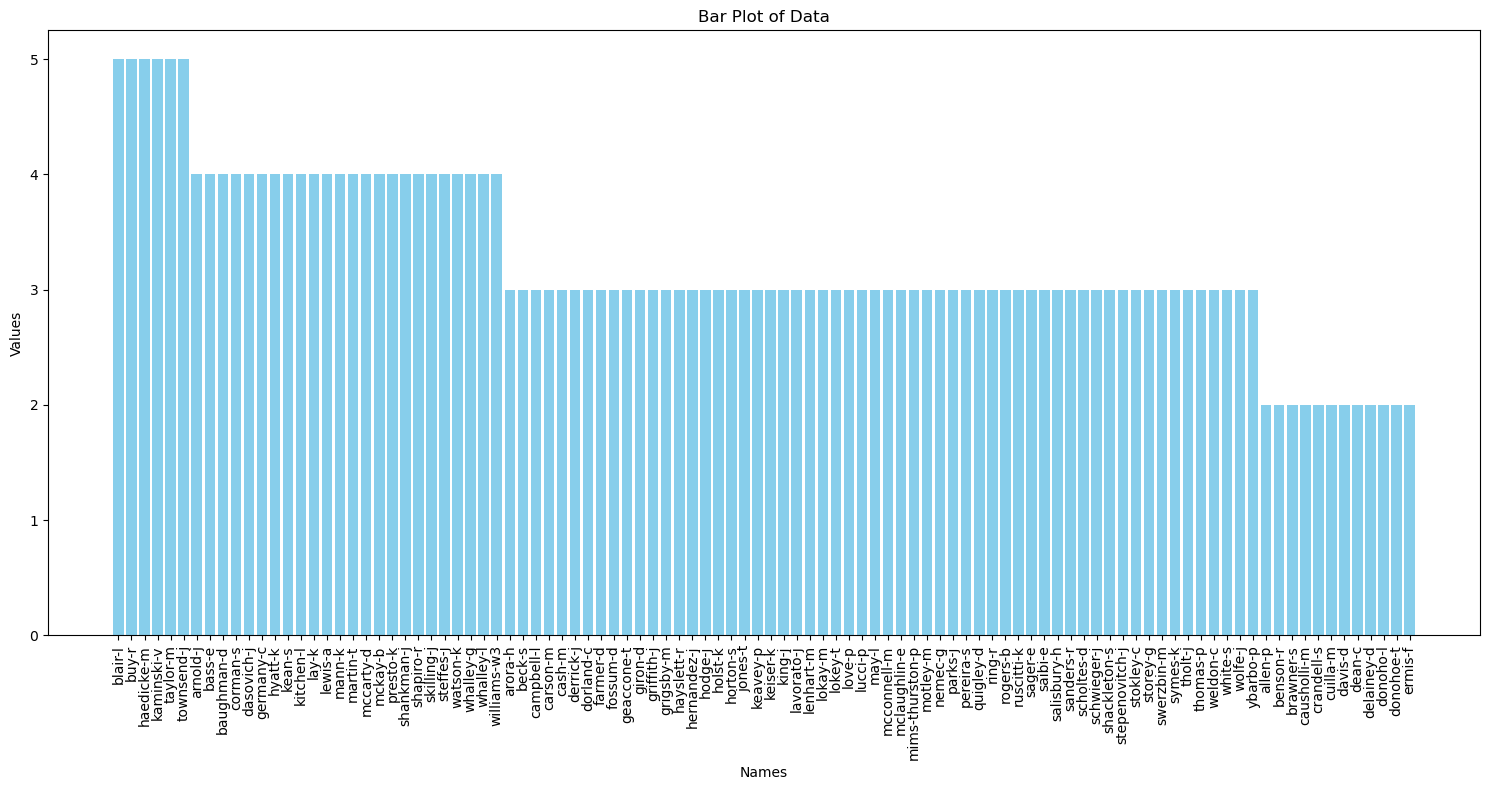

In [158]:
sorted_data = dict(sorted(name_count.items(), key=lambda item: item[1], reverse=True)[:100])

# Extract names and values
names = list(sorted_data.keys())
values = list(sorted_data.values())

# Plotting the bar plot
plt.figure(figsize=(15, 8)) 
plt.bar(names, values, color='skyblue')

# Adding labels and title
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('Bar Plot of Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Plotting Top 50 Employee Names by Total Occurrences

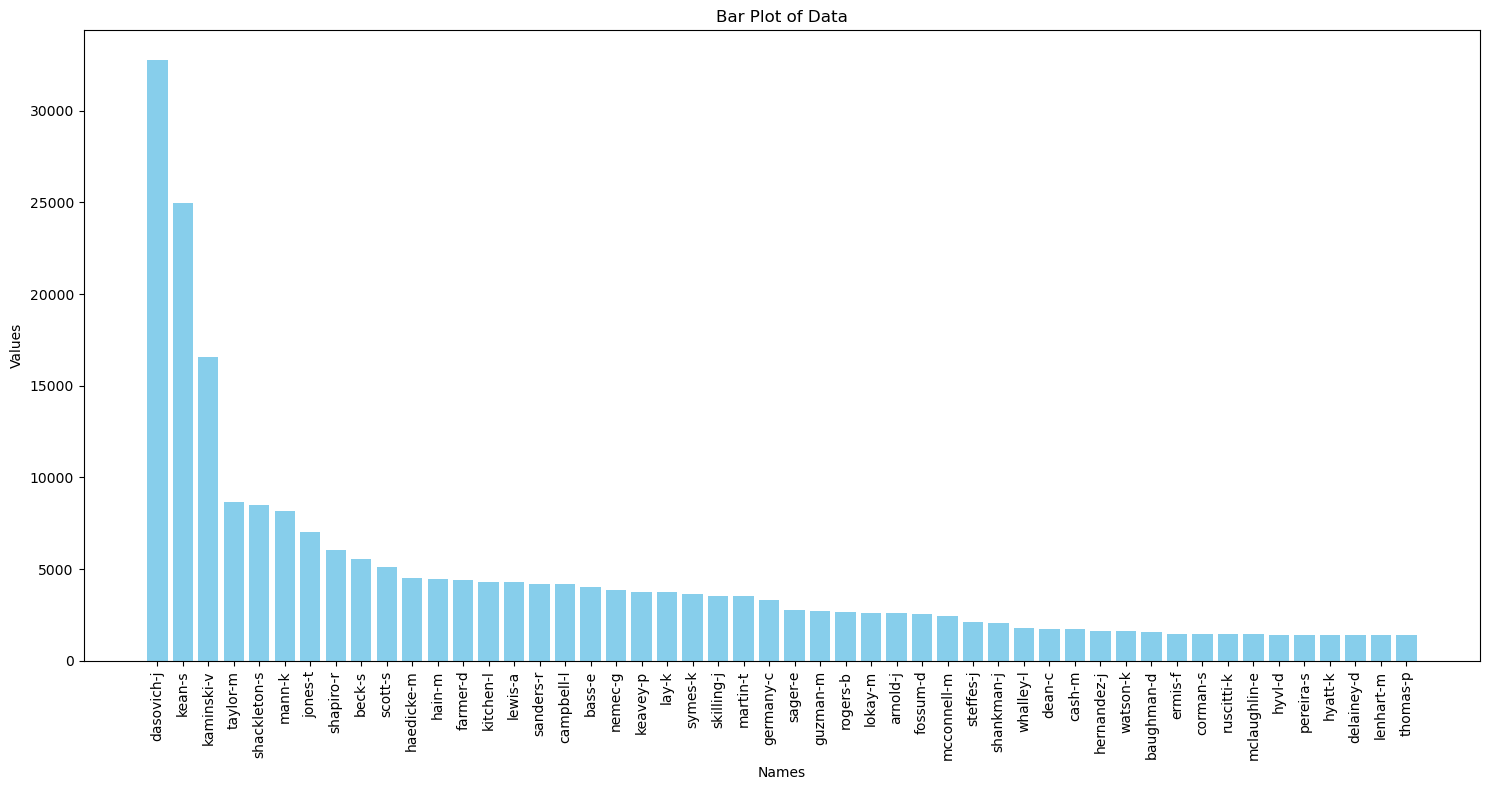

In [159]:
sorted_data = dict(sorted(total_name_count.items(), key=lambda item: item[1], reverse=True)[:50])

# Extract names and values
names = list(sorted_data.keys())
values = list(sorted_data.values())

# Plotting the bar plot
plt.figure(figsize=(15, 8)) 
plt.bar(names, values, color='skyblue')

# Adding labels and title
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('Bar Plot of Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Extracting Employee Names Occurring 3 or More Times

In [160]:
names_more_3 = []

# Iterate over the dictionary name_count
for name, value in name_count.items():
    # Check if the value (number of occurrences) is greater than or equal to 3
    if value >= 3:
        names_more_3.append(name)

print(names_more_3)

['arnold-j', 'arora-h', 'bass-e', 'baughman-d', 'beck-s', 'blair-l', 'buy-r', 'campbell-l', 'carson-m', 'cash-m', 'corman-s', 'dasovich-j', 'derrick-j', 'dorland-c', 'farmer-d', 'fossum-d', 'geaccone-t', 'germany-c', 'giron-d', 'griffith-j', 'grigsby-m', 'haedicke-m', 'hayslett-r', 'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k', 'jones-t', 'kaminski-v', 'kean-s', 'keavey-p', 'keiser-k', 'king-j', 'kitchen-l', 'lavorato-j', 'lay-k', 'lenhart-m', 'lewis-a', 'lokay-m', 'lokey-t', 'love-p', 'lucci-p', 'mann-k', 'martin-t', 'may-l', 'mccarty-d', 'mcconnell-m', 'mckay-b', 'mclaughlin-e', 'mims-thurston-p', 'motley-m', 'nemec-g', 'parks-j', 'pereira-s', 'presto-k', 'quigley-d', 'ring-r', 'rogers-b', 'ruscitti-k', 'sager-e', 'saibi-e', 'salisbury-h', 'sanders-r', 'scholtes-d', 'schwieger-j', 'shackleton-s', 'shankman-j', 'shapiro-r', 'skilling-j', 'steffes-j', 'stepenovitch-j', 'stokley-c', 'storey-g', 'swerzbin-m', 'symes-k', 'taylor-m', 'tholt-j', 'thomas-p', 'townsend-j', 'watso

### Plotting Top 50 Employee Names by Total Occurrences with Highlighted Names Occurring 3 or More Times

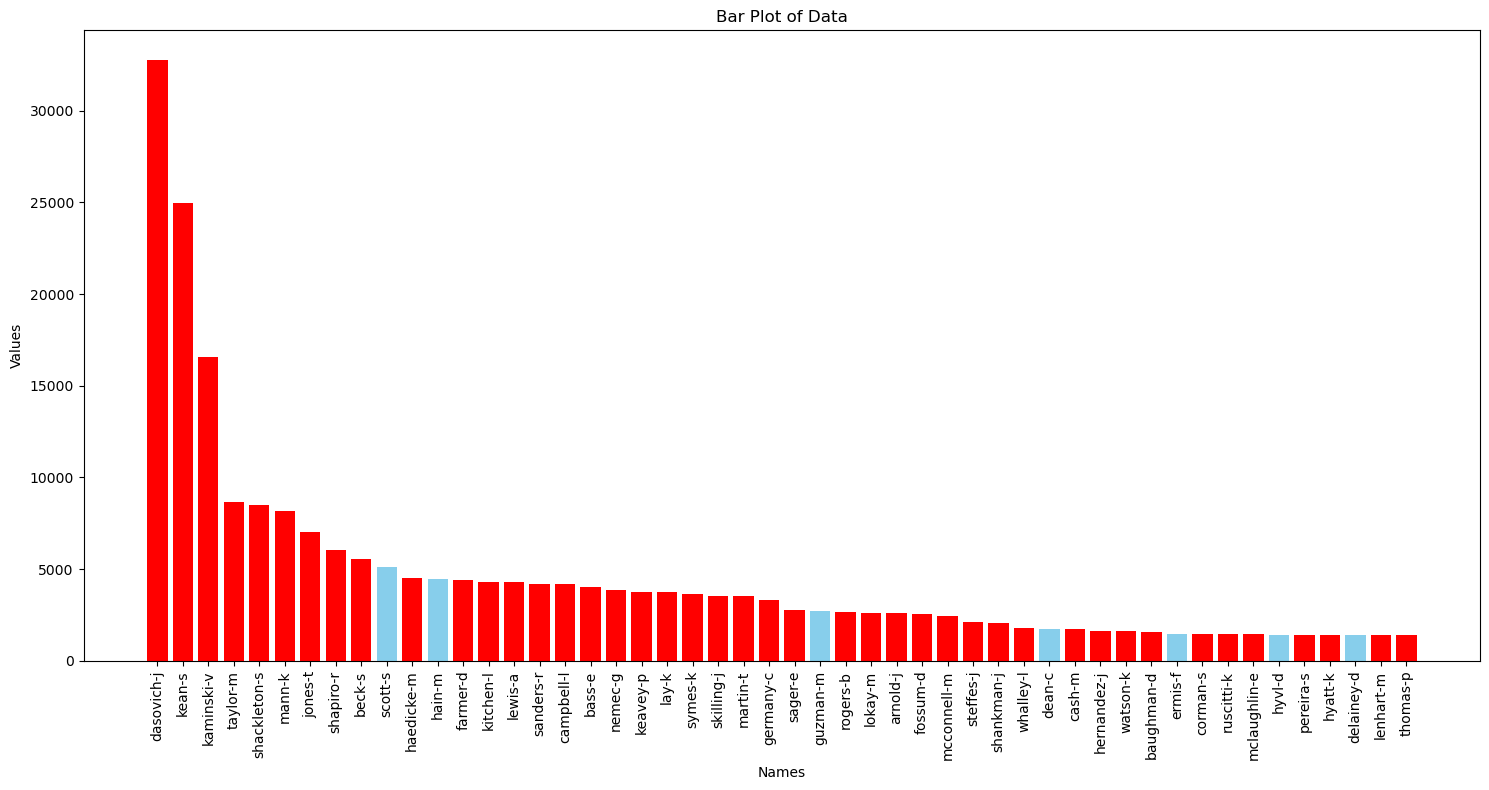

In [161]:
sorted_data = dict(sorted(total_name_count.items(), key=lambda item: item[1], reverse=True)[:50])

names = list(sorted_data.keys())
values = list(sorted_data.values())

# Define colors for the bars
colors = ['red' if name in names_more_3 else 'skyblue' for name in names]

# Plotting the bar plot with colored bars
plt.figure(figsize=(15, 8)) 
bars = plt.bar(names, values, color=colors)

# Adding labels and title
plt.xlabel('Names')
plt.ylabel('Values')
plt.title('Bar Plot of Data')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Analysing Total Employee Names

In [163]:
# Print the sorted_data dictionary containing the employee names by total occurrences
print(sorted_data)

count = 0

# Iterate over the sorted_data dictionary
for name, value in sorted_data.items():
    # Check if the name occurs 3 or more times
    if name in names_more_3:
        count += 1
# Calculate the percentage of names with 3 or more occurrences
count = round(count/100 * 100)

print(f'Percentage of names with 3 or more of keywords: {count}%')

# Calculate the total count of unique names in the total_name_count dictionary
total_name_count = len(total_name_count)

# Print the total count of unique names
print(f'Total count of unique names: {total_name_count}')

{'dasovich-j': 32739, 'kean-s': 24962, 'kaminski-v': 16569, 'taylor-m': 8650, 'shackleton-s': 8505, 'mann-k': 8170, 'jones-t': 7025, 'shapiro-r': 6021, 'beck-s': 5567, 'scott-s': 5142, 'haedicke-m': 4524, 'hain-m': 4482, 'farmer-d': 4409, 'kitchen-l': 4321, 'lewis-a': 4306, 'sanders-r': 4200, 'campbell-l': 4193, 'bass-e': 4029, 'nemec-g': 3889, 'keavey-p': 3759, 'lay-k': 3734, 'symes-k': 3651, 'skilling-j': 3538, 'martin-t': 3514, 'germany-c': 3339, 'sager-e': 2797, 'guzman-m': 2695, 'rogers-b': 2649, 'lokay-m': 2631, 'arnold-j': 2603, 'fossum-d': 2529, 'mcconnell-m': 2451, 'steffes-j': 2098, 'shankman-j': 2059, 'whalley-l': 1785, 'dean-c': 1758, 'cash-m': 1715, 'hernandez-j': 1604, 'watson-k': 1601, 'baughman-d': 1578, 'ermis-f': 1479, 'corman-s': 1476, 'ruscitti-k': 1458, 'mclaughlin-e': 1442, 'hyvl-d': 1433, 'pereira-s': 1433, 'hyatt-k': 1405, 'delainey-d': 1386, 'lenhart-m': 1386, 'thomas-p': 1386}
Percentage of names with 3 or more of keywords: 43%
Total count of unique names: 149